![title](/media/lnr-ai/christo/github_repos/mcb/img/Screenshot from 2020-03-10 05-52-40.png)

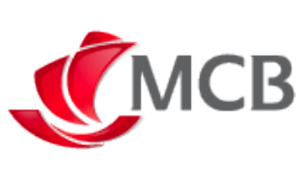

In [2]:
from IPython.display import Image
Image(filename='/media/lnr-ai/christo/github_repos/mcb/img/Screenshot from 2020-03-10 05-52-40.png')

In [3]:
from wand.image import Image as WImage

In [4]:
# sudo mv /etc/ImageMagick-6/policy.xml /etc/ImageMagick-6/policy.xml.off
# img = WImage(filename='/media/lnr-ai/christo/github_repos/mcb/data/Data Scientist Case Study Exercise - Dec 2019.pdf')
# img

### Import required libraries:

In [69]:
import pandas as pd
import numpy as np

### Define constants and filenames:

In [6]:
file_path = '/media/lnr-ai/christo/github_repos/mcb/data/'
glossary_fname = 'Glossary.xlsx'
customer_fname = 'customer.csv'
account_fname = 'account.csv'
transaction_fname = 'transaction.csv'

```
account.csv
customer.csv
transaction.csv
Glossary.xlsx
```

### Read glossary definitions; store in dataframes:

In [7]:
# glossary_fname = 'Glossary.xlsx'
account_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Accounts')
customer_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Customer')
transaction_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Transactions')

### Load .csv files and rename:

In [62]:
customer_df=pd.read_csv(filepath_or_buffer=file_path+customer_fname)
account_df=pd.read_csv(filepath_or_buffer=file_path+account_fname)
transaction_df=pd.read_csv(filepath_or_buffer=file_path+transaction_fname)

## Look at the Customer file:

### Headings:

In [9]:
list(customer_df)

['CIR',
 'RUN_DATE',
 'MARKET_SEGMENT_DESCRIPTION',
 'RESIDENT_FLAG',
 'GENDER',
 'MARITAL_STATUS_DESCRIPTION',
 'SALARY_AMOUNT',
 'NUMBER_OF_DEPENDANTS',
 'CERTIFICATION_ACHIEVEMENT_DESCRIPTION']

### Have a peek at the contents:

In [10]:
customer_df.head()

,CIR,RUN_DATE,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,MARITAL_STATUS_DESCRIPTION,SALARY_AMOUNT,NUMBER_OF_DEPENDANTS,CERTIFICATION_ACHIEVEMENT_DESCRIPTION
0,8803,9/28/2018,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE
1,8803,6/30/2015,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,NaN
2,8803,12/31/2015,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,NaN
3,8803,3/31/2016,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,SECONDARY COMPLETE
4,8803,6/30/2017,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE


### Look at the nature of the columns:

In [11]:
customer_df.dtypes

CIR                                        int64
RUN_DATE                                  object
MARKET_SEGMENT_DESCRIPTION                object
RESIDENT_FLAG                             object
GENDER                                    object
MARITAL_STATUS_DESCRIPTION                object
SALARY_AMOUNT                            float64
NUMBER_OF_DEPENDANTS                     float64
CERTIFICATION_ACHIEVEMENT_DESCRIPTION     object
dtype: object

### Look at the CIR column:

#### number of entries:

In [12]:
len(customer_df.CIR)

141169

#### unique clients:

In [13]:
len(set(customer_df.CIR))

8909

### Look at the RUN_DATE column:

In [14]:
customer_df.RUN_DATE

0          9/28/2018
1          6/30/2015
2         12/31/2015
3          3/31/2016
4          6/30/2017
             ...    
141164     3/29/2019
141165     3/29/2019
141166     3/29/2019
141167     3/29/2019
141168     3/29/2019
Name: RUN_DATE, Length: 141169, dtype: object

#### Convert RUN_DATE to a python date format:

In [15]:
customer_df['RUN_DATE'] = pd.to_datetime(customer_df['RUN_DATE'], infer_datetime_format=True)

In [16]:
customer_df['RUN_DATE']

0        2018-09-28
1        2015-06-30
2        2015-12-31
3        2016-03-31
4        2017-06-30
            ...    
141164   2019-03-29
141165   2019-03-29
141166   2019-03-29
141167   2019-03-29
141168   2019-03-29
Name: RUN_DATE, Length: 141169, dtype: datetime64[ns]

In [17]:
customer_df['RUN_DATE'].value_counts()

2019-03-29    8893
2018-12-31    8770
2018-09-28    8748
2018-06-29    8672
2018-03-30    8590
2017-12-29    8516
2017-09-29    8424
2017-06-30    8356
2017-03-31    8291
2016-12-30    8218
2016-09-30    8151
2016-06-30    8084
2016-03-31    8016
2015-12-31    7959
2015-09-30    7893
2015-06-30    7835
2015-03-31    7753
Name: RUN_DATE, dtype: int64

In [33]:
run_dates=list(set(customer_df.RUN_DATE))

In [37]:
df=customer_df[customer_df.RUN_DATE==run_dates[0]]
df.shape

(8291, 9)

### explore MARKET_SEGMENT_DESCRIPTION:

In [18]:
customer_df['MARKET_SEGMENT_DESCRIPTION'].value_counts()

MASS                        111768
SEGMENT 18-25                19949
MASS AFFLUENT                 7047
PRIVATE BANKING                960
MCB SELECT                     854
INTERNATIONAL                  417
MCB SELECT INTERNATIONAL       127
UPPER MASS                      35
YOUNG PROFESSIONAL              12
Name: MARKET_SEGMENT_DESCRIPTION, dtype: int64

In [19]:
df=customer_df[['CIR','MARKET_SEGMENT_DESCRIPTION','RUN_DATE']].groupby(['CIR','MARKET_SEGMENT_DESCRIPTION']).max()

In [20]:
gf=df.reset_index()

In [21]:
gf['RUN_DATE'].value_counts()

2019-03-29    8893
2018-09-28     150
2015-12-31     148
2015-03-31     129
2016-09-30     123
2017-06-30     111
2016-06-30     109
2018-03-30      85
2016-12-30      82
2017-09-29      81
2017-03-31      77
2016-03-31      75
2015-09-30      73
2017-12-29      68
2015-06-30      63
2018-06-29      52
2018-12-31      46
Name: RUN_DATE, dtype: int64

In [22]:
customer_df.dtypes

CIR                                               int64
RUN_DATE                                 datetime64[ns]
MARKET_SEGMENT_DESCRIPTION                       object
RESIDENT_FLAG                                    object
GENDER                                           object
MARITAL_STATUS_DESCRIPTION                       object
SALARY_AMOUNT                                   float64
NUMBER_OF_DEPENDANTS                            float64
CERTIFICATION_ACHIEVEMENT_DESCRIPTION            object
dtype: object

In [39]:
df.MARKET_SEGMENT_DESCRIPTION.value_counts()

MASS               6485
SEGMENT 18-25      1193
MASS AFFLUENT       482
PRIVATE BANKING      59
MCB SELECT           50
INTERNATIONAL        22
Name: MARKET_SEGMENT_DESCRIPTION, dtype: int64

In [42]:
len(df.CIR)-len(set(df.CIR))

0

### Explore RESIDENT_FLAG

In [23]:
customer_df['RESIDENT_FLAG'].value_counts()

Y    137150
N      4019
Name: RESIDENT_FLAG, dtype: int64

### GENDER:

In [24]:
customer_df['GENDER'].value_counts()

MALE          57856
FEMALE        56504
MALE          13397
FEMALE        12950
Name: GENDER, dtype: int64

In [27]:
customer_df['GENDER'].str.strip().value_counts()

MALE      71253
FEMALE    69454
Name: GENDER, dtype: int64

In [29]:
customer_df['GENDER']=customer_df['GENDER'].str.strip()

In [30]:
customer_df['GENDER'].value_counts()

MALE      71253
FEMALE    69454
Name: GENDER, dtype: int64

#### MARITAL_STATUS_DESCRIPTION

In [31]:
customer_df['MARITAL_STATUS_DESCRIPTION'].value_counts()

MARRIED COM         67931
SINGLE              53777
WIDOWED              4008
UNMARRIED COUPLE     3092
DIVORCED             2898
MARRIED SEP          1937
Name: MARITAL_STATUS_DESCRIPTION, dtype: int64

### Explore account detail:

In [43]:
list(account_df)

['Unnamed: 0',
 'RUN_DATE',
 'Customer_number',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [46]:
run_dates[0]

Timestamp('2017-03-31 00:00:00')

In [47]:
account_df['RUN_DATE'] = pd.to_datetime(account_df['RUN_DATE'], infer_datetime_format=True)

In [48]:
a_df=account_df[account_df.RUN_DATE==run_dates[0]]
a_df.shape

(8782, 8)

In [50]:
list(a_df)

['Unnamed: 0',
 'RUN_DATE',
 'Customer_number',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [53]:
len(a_df.Customer_number)-len(set(a_df.Customer_number))

0

In [54]:
a_df.head()

,Unnamed: 0,RUN_DATE,Customer_number,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application
69028,7104246,2017-03-31,8803,NaN,NaN,NaN,NaN,NaN
69029,7104278,2017-03-31,1,NaN,NaN,NaN,NaN,NaN
69030,7104429,2017-03-31,9060,NaN,NaN,NaN,NaN,NaN
69031,7104453,2017-03-31,8637,NaN,NaN,NaN,NaN,NaN
69032,7104504,2017-03-31,2,NaN,NaN,NaN,NaN,NaN


### Explore transaction detail:

In [59]:
transaction_df['RUN_Date'] = pd.to_datetime(transaction_df['RUN_Date'], infer_datetime_format=True)

In [60]:
transaction_df[transaction_df.RUN_Date==run_dates[0]]

,CIR,RUN_Date,sum.amt_Bank Draft_N,sum.amt_Bank Fee_N,sum.amt_Bundle Fee_N,sum.amt_Cash Depo_N,sum.amt_Cash Out_N,sum.amt_Cheque_N,sum.amt_Contra Entry_N,sum.amt_Cr Intr_N,...,sum.amt_Refill_N,sum.amt_Reject_N,sum.amt_Securities_N,sum.amt_Securities Purchase_N,sum.amt_Securities Sale_N,sum.amt_Stdin Order_N,sum.amt_Trnf_N,sum.amt_Unpaid Fee_N,sum.amt_NA_N,sum.amt_NA_P


In [61]:
transaction_df['RUN_Date']

0        1970-01-01 00:00:00.000002015
1        1970-01-01 00:00:00.000002015
2        1970-01-01 00:00:00.000002015
3        1970-01-01 00:00:00.000002015
4        1970-01-01 00:00:00.000002016
                      ...             
113123   1970-01-01 00:00:00.000002019
113124   1970-01-01 00:00:00.000002019
113125   1970-01-01 00:00:00.000002019
113126   1970-01-01 00:00:00.000002019
113127   1970-01-01 00:00:00.000002019
Name: RUN_Date, Length: 113128, dtype: datetime64[ns]

In [73]:
def frac2month(x):
    return int((x-np.floor(x))*12)

def frac2year(x):
    return int(np.floor(x))

In [72]:
int((transaction_df.RUN_Date[2]-np.floor(transaction_df.RUN_Date[2]))*12)

6

In [74]:
run_dates[0]

Timestamp('2017-03-31 00:00:00')

In [75]:
from datetime import datetime

In [76]:
datetime(2020,6,1)

datetime.datetime(2020, 6, 1, 0, 0)

In [98]:
def frac2date(x):
    return datetime(frac2year(x),frac2month(x),1)

def frac2month(x):
    f2m = int((x-np.floor(x))*12)==0
#     if f2m==0:
#         f2m=12
    return 1*f2m+(not f2m)*(int((x-np.floor(x))*12)+1)

def frac2year(x):
    return int(np.floor(x))

In [104]:
set(transaction_df.RUN_Date)

{2015.0,
 2015.25,
 2015.5,
 2015.75,
 2016.0,
 2016.25,
 2016.5,
 2016.75,
 2017.0,
 2017.25,
 2017.5,
 2017.75,
 2018.0,
 2018.25,
 2018.5,
 2018.75,
 2019.0}

In [100]:
y=transaction_df.RUN_Date[1]

In [101]:
frac2date(y)

datetime.datetime(2015, 4, 1, 0, 0)

In [102]:
transaction_df.RUN_Date.apply(frac2date)

0        2015-01-01
1        2015-04-01
2        2015-07-01
3        2015-10-01
4        2016-01-01
            ...    
113123   2019-01-01
113124   2019-01-01
113125   2019-01-01
113126   2019-01-01
113127   2019-01-01
Name: RUN_Date, Length: 113128, dtype: datetime64[ns]

In [90]:
12 % 5

2

In [92]:
x=2.25
x-np.floor(x)

0.25

In [103]:
set(gf['RUN_DATE'])

{Timestamp('2015-03-31 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-09-29 00:00:00'),
 Timestamp('2017-12-29 00:00:00'),
 Timestamp('2018-03-30 00:00:00'),
 Timestamp('2018-06-29 00:00:00'),
 Timestamp('2018-09-28 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-03-29 00:00:00')}

In [106]:
run_date_dict={}
run_date_dict['2015.00']=datetime(2015,3,31)
run_date_dict['2015.25']=datetime(2015,6,30)
run_date_dict['2015.50']=datetime(2015,9,30)
run_date_dict['2015.75']=datetime(2015,6,30)

In [107]:
run_date_dict

{'2015.00': datetime.datetime(2015, 3, 31, 0, 0)}